In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style = 'darkgrid',
    #  notebook, paper, talk, poster
    context = 'paper',
    # deep, muted, bright, pastel, dark, colorblind
    palette = 'muted',
    color_codes = True,
    font = 'serif',
    rc = {
        'axes.labelpad': 10,
        'savefig.bbox': 'tight',
        'figure.autolayout': True,
        'figure.figsize': (4.5, 3.6),
        'font.family': ['serif'],
        'font.size': 11,
        'axes.titlesize': 'large',
        'axes.labelsize': 'medium',
        'xtick.labelsize': 'small',
        'ytick.labelsize': 'small',
        # 'text.usetex': True,
        # 'pgf.rcfonts': False,
        'pgf.preamble':  r"""
            \usepackage[brazilian]{babel}
            \usepackage[T1]{fontenc}
            \usepackage[utf8]{inputenc}
        """,
    },
)

def read_df(filename):
    mixed = pd.read_csv(filename, na_values=[' ' * n for n in range(50)], dtype={'psoIter': 'Int64'})
    for col in mixed.columns:
        try:
            mixed[col] = mixed[col].str.strip()
        except:
            pass

    mixed["score"] = (mixed["size"] - mixed["blocks"]) / (mixed["size"] - 1)
    mixed["exact"] = mixed["exact"] == "Y"
    return mixed

def read_pso_df(filename):
    df = read_df(filename)
    return df[df["heuristic"] == "pso"]

df = read_df('FPT3.csv')
df.head(20)


,size,repeats,singles,maxRepeat,edges,psoIter,heuristic,blocks,score,time,exact,left,right
0,14,4,4,4,3,<NA>,combine,12,0.153846,0.000,False,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
1,14,4,4,4,3,<NA>,combineS,12,0.153846,0.000,False,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
2,14,4,4,4,3,<NA>,greedy,12,0.153846,0.000,False,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
3,14,4,4,4,3,0,pso,12,0.153846,0.276,False,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
4,14,4,4,4,3,0,psoPure,12,0.153846,0.290,False,"[0,3,0,8,0,0 1,7,3,6,1 4,4,5]","[3,0 1,0,6,5,0,7,0,4,3,1 4,8]"
5,14,4,4,4,3,0,psoComb,12,0.153846,1.033,False,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
6,14,4,4,4,3,<NA>,FPT,11,0.230769,0.170,True,NaN,NaN
7,15,3,6,4,4,<NA>,combine,13,0.142857,0.000,False,"[3,0,5,2 3,2,3,7,6,3,4,0,8,9 0]","[0,0,9 0,2 3,4,3,3,8,7,3,6,2,5]"
8,15,3,6,4,4,<NA>,combineS,13,0.142857,0.000,False,"[3,0,5,2,3,2,3,7,6,3 4,0,8,9 0]","[0,0,9 0,2,3 4,3,3,8,7,3,6,2,5]"
9,15,3,6,4,4,<NA>,greedy,13,0.142857,0.001,False,"[3,0,5,2,3,2,3,7,6,3 4,0,8,9 0]","[0,0,9 0,2,3 4,3,3,8,7,3,6,2,5]"


In [14]:
N = 7

df_better = df.copy()

select = []
for i in range(len(df) // N):
    assert df_better['heuristic'][N * i + N - 2] == "psoComb", df_better['heuristic'][N * i + N - 2]
    if df_better['blocks'][N * i + N - 2] < df_better['blocks'][N * i + N - 4]:
        select.extend([N * i + k for k in range(N)])

df_better = df_better.iloc[select]
df_better


,size,repeats,singles,maxRepeat,edges,psoIter,heuristic,blocks,score,time,exact,left,right
1190,37,4,2,11,89,<NA>,combine,22,0.416667,0.000,False,"[1 2,1 0 2,2 1,2 1,2 1 3,3 2,0 2,3 3,2,0,3 2,4...","[0,2 1,1 0 2,4 3,1,3 3,1 2,0,0,1 3,1,3,5,3 2,2..."
1191,37,4,2,11,89,<NA>,combineS,22,0.416667,0.000,False,"[1 2,1 0,2 2 1,2 1,2 1 3,3 2,0 2,3 3,2,0,3,2 4...","[0,2 1,1 0,2 4 3,1,3 3,1 2,0,0,1 3,1,3,5,3,2 2..."
1192,37,4,2,11,89,<NA>,greedy,21,0.444444,0.002,False,"[1 2,1 0,2 2 1,2 1,2,1 3 3,2 0,2 3 3 2,0,3,2 4...","[0,2 1,1 0,2 4 3,1 3 3,1 2,0,0,1,3 1,3,5,3,2 2..."
1193,37,4,2,11,89,0,pso,21,0.444444,14.946,False,"[1 2,1 0,2 2 1,2 1,2,1 3 3,2 0,2 3 3 2,0,3,2 4...","[0,2 1,1 0,2 4 3,1 3 3,1 2,0,0,1,3 1,3,5,3,2 2..."
1194,37,4,2,11,89,9,psoPure,21,0.444444,14.762,False,"[1,2,1 0,2 2 1,2 1,2,1 3,3,2 0,2 3 3,2 0,3,2 4...","[0,2 1,1 0,2 4 3,1,3 3 1,2 0,0,1 3,1 3,5,3,2 2..."
1195,37,4,2,11,89,5,psoComb,20,0.472222,18.194,False,"[1,2 1,0 2 2,1,2 1,2 1 3,3 2,0,2 3 3,2 0,3,2 4...","[0,2 1,1 0,2 4 3,1,3 3 1,2 0,0,1,3,1 3,5,3 2,2..."
1196,37,4,2,11,89,<NA>,FPT,26,0.305556,3600.000,False,NaN,NaN


In [2]:
N = 7

def diff_pso(column: pd.Series, *, selected: int = N - 1):
    rest = [i for i in range(N) if i != selected]
    match column.name:
        case 'heuristic':
            column.iat[selected] = 'best'
            return column
        case 'blocks':
            column = column - column.iat[selected]
            column.iat[selected] = column.iloc[rest].min()
            return column
        case 'score':
            column = column - column.iat[selected]
            column.iat[selected] = column.iloc[rest].max()
            return column
        case 'time':
            column = column - column.iat[selected]
            column.iat[selected] = column.iloc[rest].min()
            return column
        case _:
            return column

df_pairs = df.copy()
l = df_pairs['left'].str.strip('[]').str.split(',').str.join(' ')
r = df_pairs['right'].str.strip('[]').str.split(',').str.join(' ')
df_pairs['pair'] = l + r

select = []
for i in range(len(df) // N):
    assert df_pairs['heuristic'][N * i + N - 1].startswith('FPT'), df_pairs['heuristic'][N * i + N - 1]
    df_pairs.loc[N * i + N - 1, 'pair'] = df_pairs['pair'][N * i]
    if df_pairs['exact'][N * i + N - 1]:
        select.extend([N * i + k for k in range(N)])

# contains only cases where FPT was exact
df_exact = df_pairs.iloc[select][[col for col in df_pairs.columns if col != "exact"]]
df_exact.to_csv('FPT3-exact.csv', index=False)

# contains all
df_pairs.loc[(df_pairs['heuristic'] == "FPT") & df_pairs['exact'], 'heuristic'] = "FPT (NE)"
df_pairs = df_pairs[[col for col in df_pairs.columns if col != "exact"]]
df_pairs.to_csv('FPT3-pairs.csv', index=False)

fpt_diff = df_exact.groupby('pair').transform(diff_pso, selected=3)
fpt_diff = fpt_diff[fpt_diff["heuristic"] != "best"]
fpt_diff.head(10)


,size,repeats,singles,maxRepeat,edges,psoIter,heuristic,blocks,score,time,left,right
0,14,4,4,4,3,<NA>,combine,0,0.000000,-0.276,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
1,14,4,4,4,3,<NA>,combineS,0,0.000000,-0.276,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
2,14,4,4,4,3,<NA>,greedy,0,0.000000,-0.276,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
4,14,4,4,4,3,0,psoPure,0,0.000000,0.014,"[0,3,0,8,0,0 1,7,3,6,1 4,4,5]","[3,0 1,0,6,5,0,7,0,4,3,1 4,8]"
5,14,4,4,4,3,0,psoComb,0,0.000000,0.757,"[0,3 0,8,0,0,1,7,3,6,1 4,4,5]","[3 0,1,0,6,5,0,7,0,4,3,1 4,8]"
6,14,4,4,4,3,<NA>,FPT,-1,0.076923,-0.106,NaN,NaN
7,15,3,6,4,4,<NA>,combine,0,0.000000,-0.360,"[3,0,5,2 3,2,3,7,6,3,4,0,8,9 0]","[0,0,9 0,2 3,4,3,3,8,7,3,6,2,5]"
8,15,3,6,4,4,<NA>,combineS,0,0.000000,-0.360,"[3,0,5,2,3,2,3,7,6,3 4,0,8,9 0]","[0,0,9 0,2,3 4,3,3,8,7,3,6,2,5]"
9,15,3,6,4,4,<NA>,greedy,0,0.000000,-0.359,"[3,0,5,2,3,2,3,7,6,3 4,0,8,9 0]","[0,0,9 0,2,3 4,3,3,8,7,3,6,2,5]"
11,15,3,6,4,4,0,psoPure,0,0.000000,-0.004,"[3,0,5,2,3,2 3,7,6,3,4,0,8,9 0]","[0,0,9 0,2 3,4,3,3,8,7,3,6,2,5]"


Text(0, 0.5, 'Quantidade de instâncias')

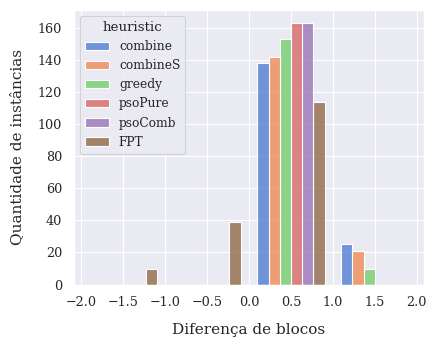

In [3]:
sns.histplot(fpt_diff, x="blocks", hue="heuristic", multiple="dodge", binwidth=1, shrink=0.8)
plt.xlabel("Diferença de blocos")
plt.ylabel("Quantidade de instâncias")


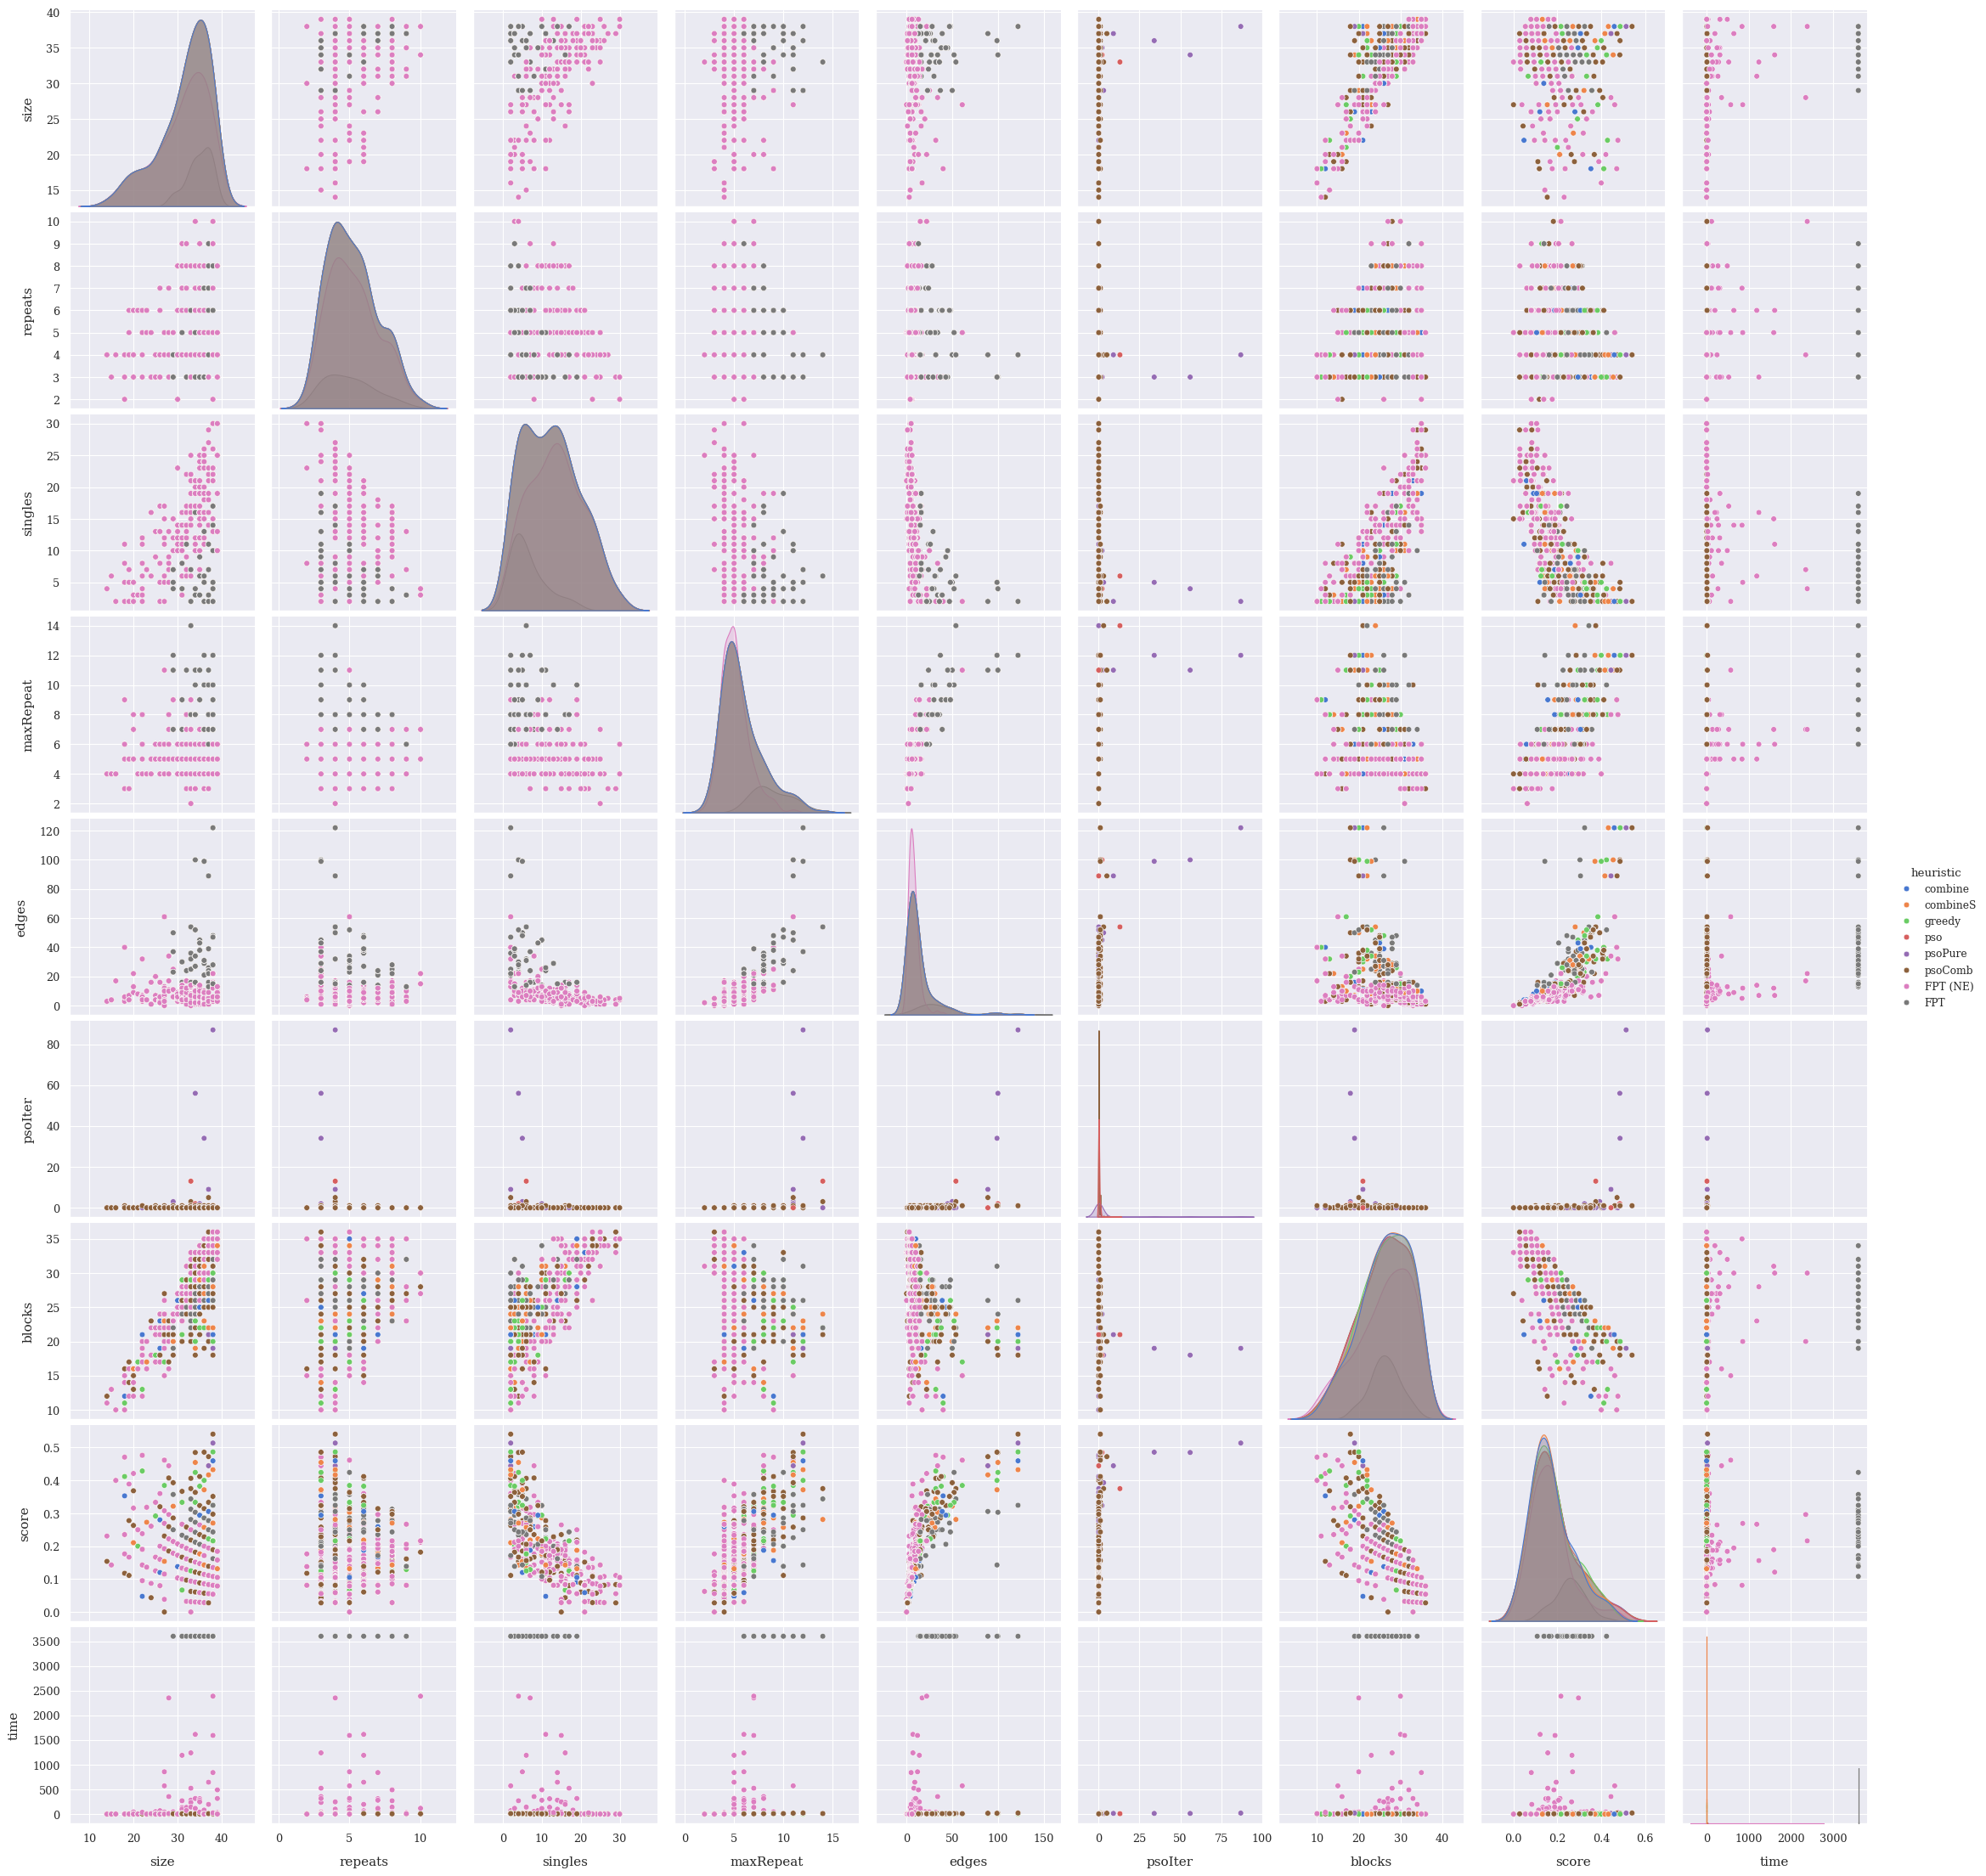

In [4]:
sns.pairplot(df_pairs, hue="heuristic")


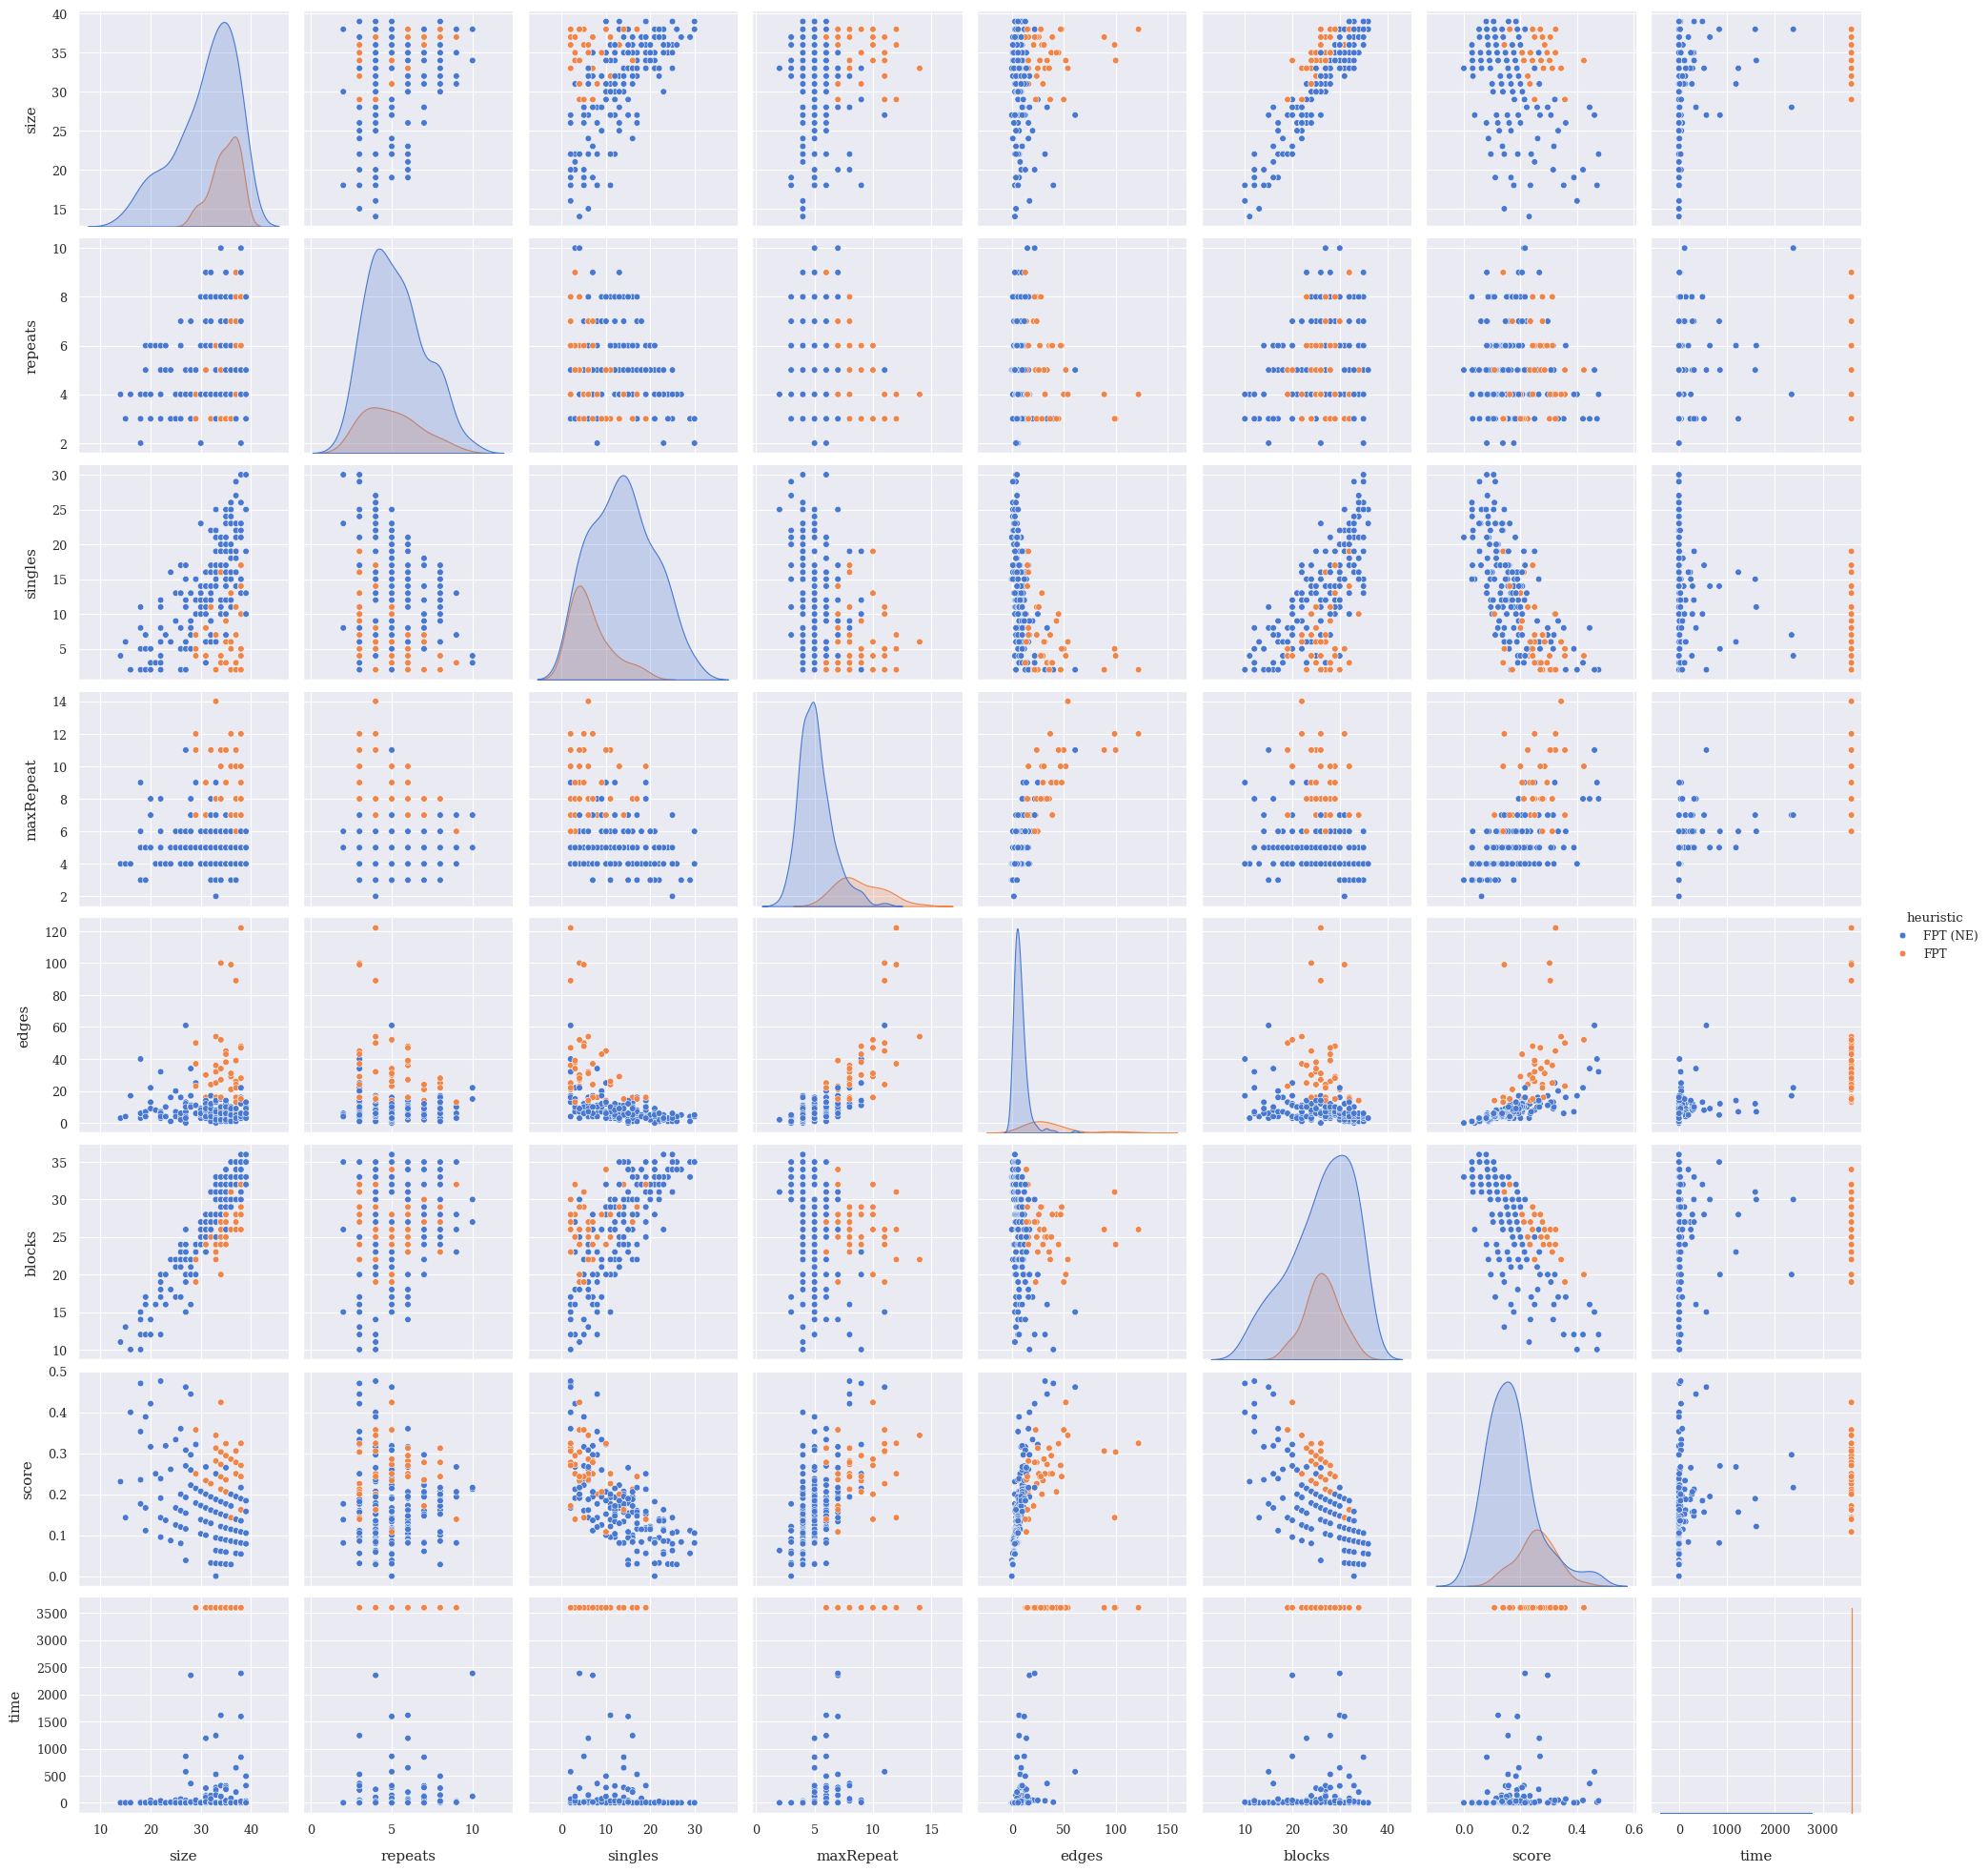

In [5]:
columns = ['size', 'repeats', 'singles', 'maxRepeat', 'edges', 'heuristic', 'blocks', 'score', 'time']
dfpt = df_pairs[df_pairs['heuristic'].str.startswith('FPT')][columns].copy()

sns.pairplot(dfpt, hue='heuristic')


/home/marmis/.local/share/virtualenvs/default/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='lnE', ylabel='lnT'>

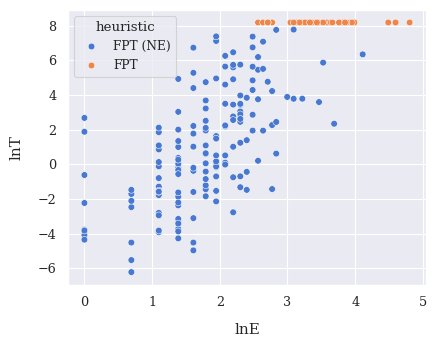

In [6]:
dfs = dfpt.copy()
dfs['lnE'] = np.log(dfs['edges'])
dfs['lnT'] = np.log(dfs['time'])

sns.scatterplot(dfs, x="lnE", y="lnT", hue="heuristic")


<Axes: xlabel='edges', ylabel='time'>

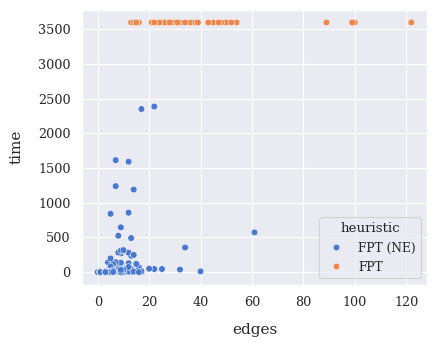

In [7]:

sns.scatterplot(dfs, x="edges", y="time", hue="heuristic")


<Axes: xlabel='maxRepeat', ylabel='time'>

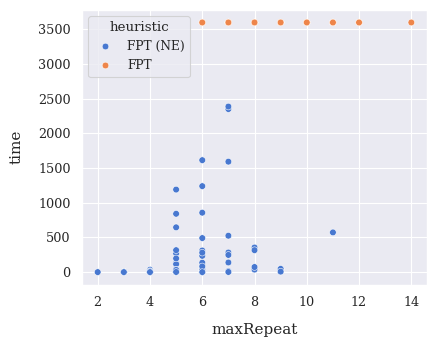

In [8]:
sns.scatterplot(dfs, x="maxRepeat", y="time", hue="heuristic")


In [9]:
# dfc = df[df['heuristic'].str.startswith('pso')].copy()

# l = dfc['left'].str.strip('[]').str.split(',').str.join(' ')
# r = dfc['right'].str.strip('[]').str.split(',').str.join(' ')
# dfc['pair'] = l + r

# dfc = dfc.groupby('pair').transform(lambda x: diff_pso(x, selected=0))
# dfc = dfc[dfc["heuristic"] != "best"]
# dfc
